In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import importlib

In [2]:
import collective_Smatrix as tools
import platonic_solid as positions

In [5]:
# number of multipoles to be included
lmax = 8

# ring radius
ka = np.pi

# particle pseudo-radius
kR = 0.8

In [6]:
# generate positions on the vertices of a platonic solid
importlib.reload(positions)

# tetrahedron (Nring=4)
N = 4+1
pos = np.zeros((3,N))
pos[:,:(N-1)] = positions.platonic(4, ka)
print(pos)

[[ 1.81379936  1.81379936 -1.81379936 -1.81379936  0.        ]
 [ 1.81379936 -1.81379936  1.81379936 -1.81379936  0.        ]
 [ 1.81379936 -1.81379936 -1.81379936  1.81379936  0.        ]]


In [7]:
# optical properties of the objects
# for an artificial dielectric
eps0 = 10
eps = eps0 + np.zeros(N, dtype=np.complex_)
# add absorption for the central (last) dipole
eps[N-1] = (np.sqrt(eps0)+0.1*1j)**2

# clausius-Mossoti relation
alpha_0 = 4*np.pi*(eps-1)/(eps+2)*kR**3
# inclusion of radiative correction
alpha = alpha_0/(1-1j*alpha_0/(6*np.pi))
print(np.imag(alpha)-np.abs(alpha)**2/(6*np.pi))

[-2.22044605e-16 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16
  7.88004401e-02]


In [8]:
# buliding the S matrix of size Nsph by Nsph
importlib.reload(tools)
S = tools.matrix_Sdip(pos,alpha,lmax)

In [9]:
# for comparison, same with only central absorber
importlib.reload(tools)
S_CA = tools.matrix_Sdip(pos[:,[N-1]], [alpha[N-1]], lmax)

In [10]:
# singular value decomposition (Sigma is a numpy vector)
U, Sigma, V = np.linalg.svd(S)
U_CA, Sigma_CA, V_CA = np.linalg.svd(S_CA)

In [11]:
# get the singular values for the absorption operator
abstot = 1-Sigma*Sigma
abs_CA = 1-Sigma_CA*Sigma_CA

In [12]:
print('Number of surrounding dipoles :',N-1)
print('The maximum abs goes from', max(abs_CA), 'to', max(abstot))
print('The relative increase of the max absolute value is', 100*(max(abstot)-max(abs_CA))/max(abs_CA))

Number of surrounding dipoles : 4
The maximum abs goes from 0.016721972749294656 to 0.01850376792936037
The relative increase of the max absolute value is 10.655412532835712


In [17]:
ka_vect = np.arange(2,5.1,0.1)

In [28]:
pos_origin = np.array([0, 0, 0]).reshape(3,-1)
S_CA = tools.matrix_Sdip(pos_origin, [alpha[N-1]], lmax)
U_CA, Sigma_CA, V_CA = np.linalg.svd(S_CA)
abs_CA = 1-Sigma_CA*Sigma_CA
print(abs_CA)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01672197 0.01672197 0.01672197]


In [86]:
lmax = 8

N = 20+1
pos = np.zeros((3,N))

# optical properties of the objects
# for an artificial dielectric
eps0 = 10
eps = eps0 + np.zeros(N, dtype=np.complex_)
# add absorption for the central (last) dipole
eps[N-1] = (np.sqrt(eps0)+0.1*1j)**2

# clausius-Mossoti relation
alpha_0 = 4*np.pi*(eps-1)/(eps+2)*kR**3
# inclusion of radiative correction
alpha = alpha_0/(1-1j*alpha_0/(6*np.pi))
print(np.imag(alpha)-np.abs(alpha)**2/(6*np.pi))

z = 0*ka_vect

pos_origin = np.array([0, 0, 0]).reshape(3,-1)
S_CA = tools.matrix_Sdip(pos_origin, [alpha[N-1]], lmax)
U_CA, Sigma_CA, V_CA = np.linalg.svd(S_CA)
abs_CA = 1-Sigma_CA*Sigma_CA

for i, ka in enumerate(ka_vect):
    pos[:,:(N-1)] = positions.platonic(N-1, ka)
    
    print("["+str(i)+"/"+str(len(ka_vect))+"]", "Calculating S for ka=", ka, "...")
    S = tools.matrix_Sdip(pos, alpha, lmax)
    print("Done")
    U, Sigma, V = np.linalg.svd(S)
    abstot = 1-Sigma*Sigma
    

    z[i] = (max(abstot)-max(abs_CA))/max(abs_CA)
    print('The maximum abs goes from', max(abs_CA), 'to', max(abstot))
    print('The relative increase of the max absolute value is', 100*(max(abstot)-max(abs_CA))/max(abs_CA))

[-2.22044605e-16 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16
 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16
 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16
 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16
 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16
  7.88004401e-02]
[0/31] Calculating S for ka= 2.0 ...
Done
The maximum abs goes from 0.016721972749294656 to 0.018466043147944755
The relative increase of the max absolute value is 10.429812467692638
[1/31] Calculating S for ka= 2.1 ...
Done
The maximum abs goes from 0.016721972749294656 to 0.018945739408417817
The relative increase of the max absolute value is 13.298470775327395
[2/31] Calculating S for ka= 2.2 ...
Done
The maximum abs goes from 0.016721972749294656 to 0.019657089748030154
The relative increase of the max absolute value is 17.552456535723657
[3/31] Calculating S for ka= 2.3000000000000003 ...
Done
The maximum abs goes from 0.016721972749294656 to 0

In [87]:
z_N20_lmax8 = z

## Test convergence on lmax

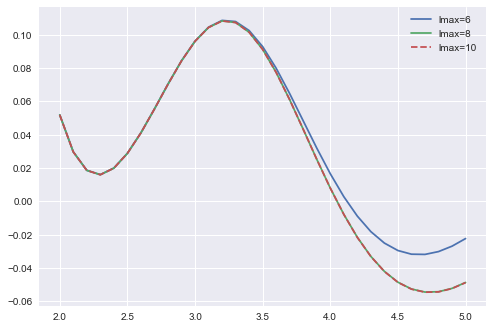

In [59]:
#style.use('dark_background')
style.use('seaborn')
#plt.plot(ka_vect, z_lmax4)
plt.plot(ka_vect, z_N4_lmax6)
plt.plot(ka_vect, z_N4_lmax8)
plt.plot(ka_vect, z_N4_lmax10, '--')
plt.grid(True)
plt.legend(["lmax=6", "lmax=8", "lmax=10"])
plt.show()

## Fig 1a

In [110]:
style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

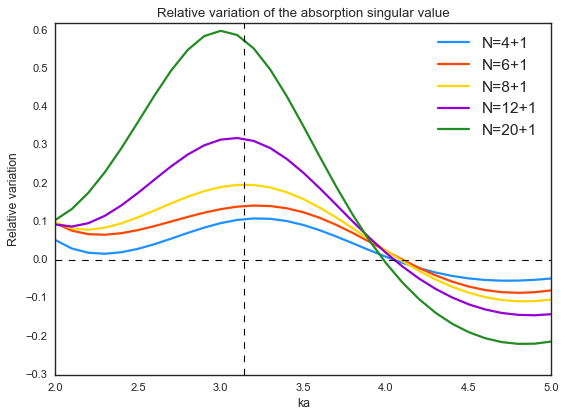

In [113]:
style.use('seaborn-bright')
plt.plot(ka_vect, z_N4_lmax8, linewidth=2, color='dodgerblue')
plt.plot(ka_vect, z_N6_lmax8, linewidth=2, color='orangered')
plt.plot(ka_vect, z_N8_lmax8, linewidth=2, color='gold')
plt.plot(ka_vect, z_N12_lmax8, linewidth=2, color='darkviolet')
plt.plot(ka_vect, z_N20_lmax8, linewidth=2, color='forestgreen')
plt.grid(False)
plt.axhline(linestyle='--', color="black", linewidth=1)
plt.axvline(x=np.pi, linestyle='--', color="black", linewidth=1)
plt.legend(["N=4+1", "N=6+1", "N=8+1", "N=12+1", "N=20+1"], fontsize=14)
plt.xlabel('ka')
plt.ylabel('Relative variation')
plt.ylim(-0.3, 0.62)
plt.yticks(np.arange(-0.3, 0.7, 0.1))
plt.title('Relative variation of the absorption singular value')
plt.show()

## Save computations as pickled dataframe

In [99]:
import pandas as pd

df = pd.DataFrame(columns=['N', 'lmax', 'vector'])
df = df.append({'N': 4, 'lmax': 6, 'vector': z_N4_lmax6}, ignore_index=True)
df = df.append({'N': 4, 'lmax': 8, 'vector': z_N4_lmax8}, ignore_index=True)
df = df.append({'N': 4, 'lmax': 10, 'vector': z_N4_lmax10}, ignore_index=True)
df = df.append({'N': 6, 'lmax': 8, 'vector': z_N6_lmax8}, ignore_index=True)
df = df.append({'N': 8, 'lmax': 8, 'vector': z_N8_lmax8}, ignore_index=True)
df = df.append({'N': 12, 'lmax': 8, 'vector': z_N12_lmax8}, ignore_index=True)
df = df.append({'N': 20, 'lmax': 8, 'vector': z_N20_lmax8}, ignore_index=True)
df.head()

,N,lmax,vector
0,4,6,"[0.05192675830142205, 0.029756494531161918, 0...."
1,4,8,"[0.05191450515145582, 0.02973862880885695, 0.0..."
2,4,10,"[0.051914501124816013, 0.029738621070453088, 0..."
3,6,8,"[0.0963106978386177, 0.0763679555414491, 0.067..."
4,8,8,"[0.09811566082168302, 0.08247867183950455, 0.0..."


In [105]:
df.to_pickle('save_fig1.pickle')

## Fig 1b

In [ ]:
lmax = 8
ka = np.pi
kR = 0.8
N = 6+1

In [ ]:
pos = np.zeros((3,N))
pos[:,:(N-1)] = positions.platonic(N-1, ka)

eps0 = 10
eps = eps0 + np.zeros(N, dtype=np.complex_)
eps[N-1] = (np.sqrt(eps0)+0.1*1j)**2

alpha_0 = 4*np.pi*(eps-1)/(eps+2)*kR**3
alpha = alpha_0/(1-1j*alpha_0/(6*np.pi))
print(np.imag(alpha)-np.abs(alpha)**2/(6*np.pi))

In [ ]:
S = tools.matrix_Sdip(pos, alpha, lmax)
U, Sigma, V = np.linalg.svd(S)

In [ ]:
def histo_freefield(V, lmax):
    '''
    function that prepares data for the histogram 1b
    by gathering amplitudes by values of l
    of the mode with maximum absorption
    V vector of size Nsph=2*lmax*(2*lmax+1)
    '''

    # l from 1 to lmax
    # m from -lmax to +lmax
    n = lmax*(2*lmax+1)
    A2 = np.zeros((lmax,2))

    for l in range(1, lmax+1):
        for m in range(-l, l+1):
            ind = (l-1)*(2*lmax+1)+m+lmax
            A2[l,0] += V[ind]**2
            A2[l,1] += V[n+ind]**2
    return np.sqrt(A2)

In [ ]:
ampl = histo_freefield(V, lmax)
print(ampl.shape)

In [ ]:
plt.bar(ampl)
plt.show()

## Parallel implementation with joblib

In [ ]:
from joblib import Parallel, delayed

In [ ]:
def rel_increase(ka, abs_CA, alpha, lmax):
    N = len(alpha)
    pos = np.zeros((3,N))
    pos[:,:(N-1)] = positions.platonic(N-1, ka)
    
    S = tools.matrix_Sdip(pos, alpha, lmax)
    U, Sigma, V = np.linalg.svd(S)
    abstot = 1-Sigma*Sigma
    return (max(abstot)-max(abs_CA))/max(abs_CA)

In [ ]:
z = Parallel(n_jobs=2)(delayed(rel_increase)(ka, abs_CA, alpha, lmax) for ka in ka_vect)